# Week 3: Model Building & Prediction 🌿

In this notebook:
✅ Loaded cleaned dataset  
✅ Split data into train and test  
✅ Trained Random Forest model  
✅ Evaluated performance using RMSE, MAE, R²  
✅ Saved the trained model for Week 4 deployment  


### Import Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import time

# Set global plot style
sns.set(style='whitegrid')

# Ensures reproducibility
random_state_num = 42


### Load Cleaned Dataset

In [2]:
# Replace with your cleaned dataset path if needed
data = pd.read_csv('data_cleaned.csv')
print("Dataset loaded successfully.")
data.head()


Dataset loaded successfully.


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06


### Prepare Features and Target Variable

In [6]:
# ✅ Replace with your actual target column
target_column = 'co2_per_cap'  # predicting CO2 emissions per capita

X = data.drop(columns=[target_column])
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state_num)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 1360
Testing samples: 340


### Model Initialization and Training

In [11]:
# Correct target column
target_column = 'co2_per_cap'  # or your actual numeric target

# Prepare X and y
X = data.drop(columns=[target_column]).select_dtypes(include=['number'])
y = data[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state_num
)

print(f"✅ Training samples: {X_train.shape[0]}")
print(f"✅ Testing samples: {X_test.shape[0]}")

# Train model
start_time = time.time()

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=random_state_num,
    n_jobs=-1
)

rf.fit(X_train, y_train)

end_time = time.time()
print(f"✅ Model training completed in {end_time - start_time:.2f} seconds 🚀")


✅ Training samples: 1360
✅ Testing samples: 340
✅ Model training completed in 0.41 seconds 🚀


### Prediction and Model Evaluation

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5  # compute RMSE manually
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE: {mae:.4f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 0.4643
✅ MAE: 0.2103
✅ R² Score: 0.9911


### Actual vs Predicted Visualization

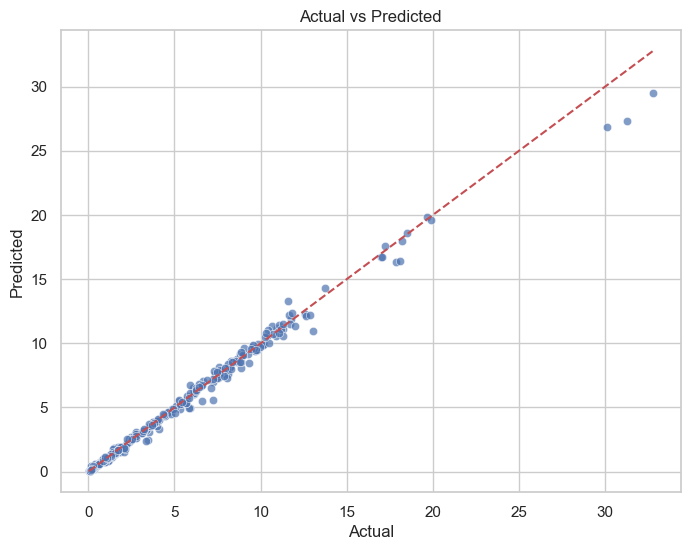

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


### Feature Importance

C:\Users\deepi\AppData\Local\Temp\ipykernel_21396\2316945379.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


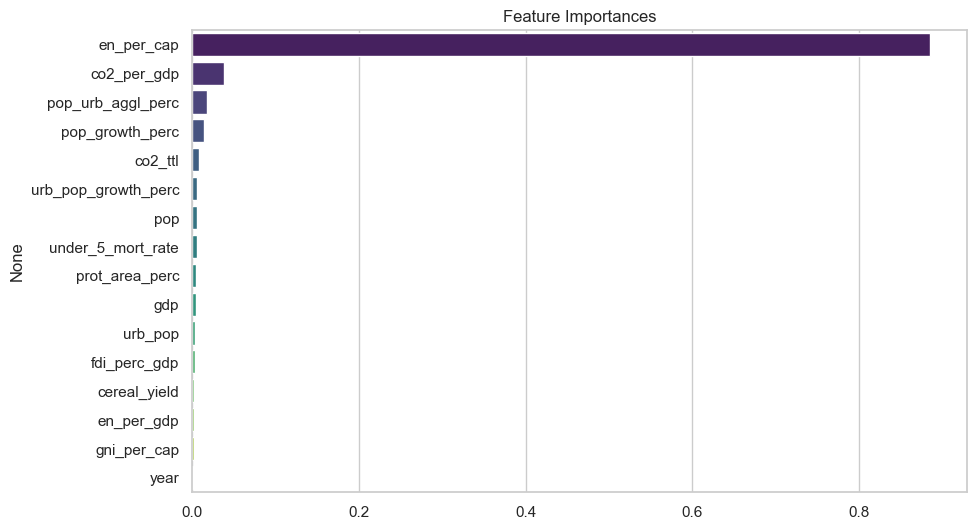

In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.show()


### Cross-validation (5-Fold) for Robust Evaluation

In [15]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean CV R² score:", np.mean(cv_scores))


Cross-validation R² scores: [0.94021348 0.9582526  0.97921334 0.98848927 0.98069527]
Mean CV R² score: 0.9693727914365777
